In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-6v_p7pyf
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-6v_p7pyf
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369106 sha256=bd6177b8c4b16c75aae0d9f65471a17cdbd88d61c826117231ee9f7020b86668
  Stored in directory: /tmp/pip-ephem-wheel-cache-2yph7duc/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=8733472c4c8bdb6e12c932ac8063be76fba60417d6af4fca060db44cb5a92c80
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built clip ftfy


In [ ]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(Image.open("img1.png")).unsqueeze(0).to(device)
text = clip.tokenize(["a vegetable", "not vegetable"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

Label probs: [[0.6979138  0.30208617]]


In [ ]:
#TODO: add some more model for face detection


In [ ]:
image = preprocess(Image.open("img6.png")).unsqueeze(0).to(device)
text = clip.tokenize(["tomato", "cucumber", "knot"]).to(device)
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

Label probs: [[2.0029645e-02 9.7981483e-01 1.5552655e-04]]


In [1]:
!pip install dlib 

In [54]:
import dlib
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import torchvision
from PIL import Image
import matplotlib

In [4]:
!cp /content/drive/MyDrive/Tulahack/model_6.pt ./ 

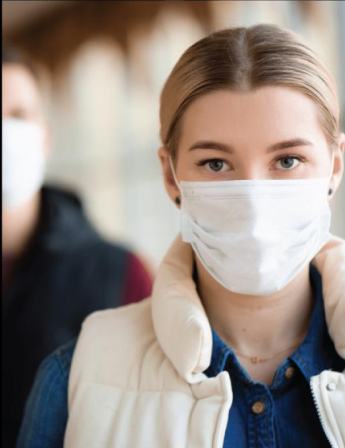

In [176]:
img = cv2.imread("img2.png")
cv2_imshow(img)

In [ ]:
detector = dlib.get_frontal_face_detector()
img = cv2.imread("img2.png")
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
faces = detector(gray)

color_yellow = (0,255,255)

for face in faces:
    x1 = face.left() 
    y1 = face.top() 
    x2 = face.right() 
    y2 = face.bottom() 

    cv2.rectangle(img=img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=4)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, 'Hello', (x1, y1), font, 0.8, color=(15, 128, 228), thickness=2)

cv2_imshow(img)

In [ ]:
!cp /content/drive/MyDrive/Tulahack/shape_predictor_68_face_landmarks.dat shape_predictor_68_face_landmarks.dat

In [11]:
!cp /content/drive/MyDrive/Tulahack/shape_predictor_68_face_landmarks.dat ./

[[137 140 145 ... 203 203 201]
 [140 143 148 ... 201 199 198]
 [143 145 151 ... 200 198 195]
 ...
 [136 135 138 ... 203 203 204]
 [188 194 197 ... 217 216 215]
 [202 208 211 ... 229 228 227]]


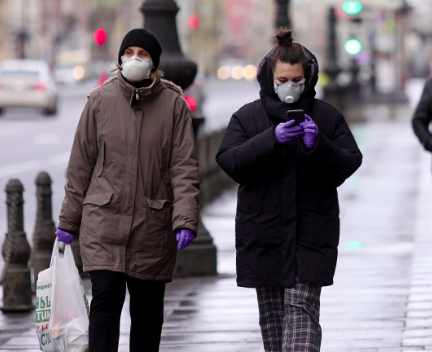

In [138]:
# Load the predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# read the image
img = cv2.imread("img4.png")

gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

print(gray)

faces = detector(gray)

# print(faces)
    
for face in faces:
    x1 = face.left() 
    y1 = face.top() 
    x2 = face.right() 
    y2 = face.bottom() 

    landmarks = predictor(image=gray, box=face)
    cv2.rectangle(img=img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=4)

    for n in range(68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        #print(x, y)
        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

cv2_imshow(img)

In [ ]:
dlib.rectangles([dlib.rectangle(1, 2, 3, 4)])

rectangles[[(1, 2) (3, 4)]]

In [32]:
model_detection = torchvision.models.detection.fasterrcnn_resnet50_fpn()
model_detection.load_state_dict(torch.load("model_6.pt", map_location=torch.device('cpu')))

model_landmarks = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

model_detection.eval();

In [33]:
face_mask = FaceMask(model_detection, model_landmarks, 'cpu')

In [247]:
class FaceMask():

  def __init__(self, model_detection, model_landmarks, device, TH1, TH2):
    self.model_detection = model_detection
    self.model_landmarks = model_landmarks
    self.transforms = torchvision.transforms.PILToTensor()
    self.device = device
    self.TH1 = TH1
    self.TH2 = TH2

  def find_area_of_intersection(self, face, mask):
    x_max, y_max = min(mask[2], face[2]), min(mask[3], face[3])
    x_min, y_min = max(mask[0], face[0]), max(mask[1], face[1])
    if x_max < x_min or y_max < y_min:
      return 0
    return (x_max - x_min) * (y_max - y_min)

  def get_detection(self, picture):

    predictions = self.model_detection(picture.unsqueeze(0))
    faces = []
    masks = []
    for box, label, score in zip(predictions[0]["boxes"].tolist(),
                          predictions[0]["labels"].tolist(), 
                          predictions[0]["scores"].tolist()):

      if label == 2 and score >= self.TH2:
        faces.append(box)
      if label == 1 and score >= self.TH1:
        masks.append(box)

    return (faces, masks)

  def draw_something(self, boxes, labels, n, picture):
    draw_pic_with_rect(picture, boxes, labels, n)

  def face_mask_corr(self, faces, masks):
    face_mask = []
    for face in faces:
      max_area = 0
      best_mask = None
      for mask in masks:
        if self.find_area_of_intersection(face, mask) > max_area:
          max_area = self.find_area_of_intersection(face, mask)
          best_mask = mask
      face_mask.append(best_mask)
    return face_mask

  def find_landmarks(self, path, faces, masks):

    face_lands = []

    img = cv2.imread(path)

    gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

    face_lands = []
        
    for face in faces:
        x1 = int(face[0])
        y1 = int(face[1])
        x2 = int(face[2])
        y2 = int(face[3]) 

        box = dlib.rectangle(x1, y1, x2, y2)

        landmarks = self.model_landmarks(image=gray, box=box)
        # cv2.rectangle(img=img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=1)

        el = {}
        el['lips_points'] = []
        el['nose_points'] = []

        for n in points['lips_points']:
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            el['lips_points'].append((x, y))


        for n in points['nose_points']:
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            el['nose_points'].append((x, y))
            # cv2.circle(img=img, center=(x, y), radius=1, color=(0, 255, 0), thickness=1)

        face_lands.append(el)
    return face_lands

    # for mask in masks:
    #     x1 = int(mask[0])
    #     y1 = int(mask[1])
    #     x2 = int(mask[2])
    #     y2 = int(mask[3]) 

    #     cv2.rectangle(img=img, pt1=(x1, y1), pt2=(x2, y2), color=(255, 0, 0), thickness=1, )


    # cv2_imshow(img)   


  def faces_walker(self, path, faces, face_mask, face_lands, path_to_save):
    img = cv2.imread(path)
    for face, face_m, land in zip(faces, face_mask, face_lands):
        x1 = int(face[0])
        y1 = int(face[1])
        x2 = int(face[2])
        y2 = int(face[3]) 

        cv2.rectangle(img=img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 0, 139), thickness=2)

        if face_m is None:
            cv2.putText(img, 'No mask!!!', (x1, y1), font, 0.7, color=(0, 69, 255), thickness=2)
            continue

        mx1 = int(face_m[0])
        my1 = int(face_m[1])
        mx2 = int(face_m[2])
        my2 = int(face_m[3])

        cv2.rectangle(img=img, pt1=(mx1, my1), pt2=(mx2, my2), color=(255, 0, 0), thickness=2)
        
        out_of_lips = 0
        
        for point in land['lips_points']:
            x = point[0]
            y = point[1]
            if y > max(my1, my2) or y < min(my1, my2):
                out_of_lips += 1

        if (out_of_lips > 2):
            cv2.putText(img, 'Out of mouth', (x1, y1), font, 0.7, color=(0, 255, 0), 
                        thickness=2)
            continue

        out_of_nose = 0
        
        for point in land['nose_points']:
            x = point[0]
            y = point[1]
            if y > max(my1, my2) or y < min(my1, my2):
                out_of_nose += 1

        if (out_of_nose > 2):
            cv2.putText(img, 'Out of nose', (x1, y1), font, 0.7, color=(0, 69, 255), 
                        thickness=2)
            continue
        
        cv2.putText(img, 'OK!!!', (x1, y1), font, 0.7, color=(50, 205, 155), 
                        thickness=2)

    cv2.imwrite(path_to_save, img)


  
  def __call__(self, path, path_to_save):
    picture_pil = Image.open(path)
    picture_torch = self.transforms(picture_pil).to(dtype=torch.float32)[:3, :, :]

    faces, masks = self.get_detection(picture_torch)

    face_mask = self.face_mask_corr(faces, masks)

    face_lands = self.find_landmarks(path, faces, masks)
    
    self.faces_walker(path, faces, face_mask, face_lands, path_to_save)

face_mask = FaceMask(model_detection, model_landmarks, 'cpu', 0.4, 0.626)
face_mask('seva5.jpg', 'test1.jpg')

In [15]:
# jaw_points = list(range(0, 17))
# r_braw_points = list(range(17, 22))
# l_braw_points = list(range(22, 27))
# nose_points = list(range(27, 36))
# r_eye_points = list(range(36, 42))
# l_eye_points = list(range(42, 48))
# mouth_points = list(range(48, 61))
# lips_points = list(range(61, 68))

points = {
  "jaw_points" : list(range(0, 17)),
  "r_braw_points" : list(range(17, 22)),
  "l_braw_points" : list(range(22, 27)),
  "nose_points" : list(range(27, 36)),
  "r_eye_points" : list(range(36, 42)),
  "l_eye_points" : list(range(42, 48)),
  "mouth_points" : list(range(48, 61)),
  "lips_points" : list(range(61, 68)),
  }

In [82]:
def draw_pic_with_rect(picture, boxes, labels, n=5):
    boxes = boxes[:n]
    labels = labels[:n]
    if isinstance(picture, torch.Tensor):
        picture = picture.detach().cpu().permute(1, 2, 0).numpy()
    picture = picture.astype(dtype=np.int)

    fig, ax = plt.subplots(figsize = (15, 15))
    ax.imshow(picture)

    for box, label in zip(boxes, labels):
        rect = matplotlib.patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                       linewidth=1, edgecolor='r', facecolor='none')
        ax.text(box[0], box[1], label, fontsize = 12)
        ax.add_patch(rect)

    fig.show()

In [40]:
a = [1, 2, 3]
b = [3, 4, 5]
c = [4, 5, 6]
for i, j, k in zip(a, b, c):
  print(i, j, k)

1 3 4
2 4 5
3 5 6


In [51]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.PILToTensor(),                                           
])
device = 'cpu'

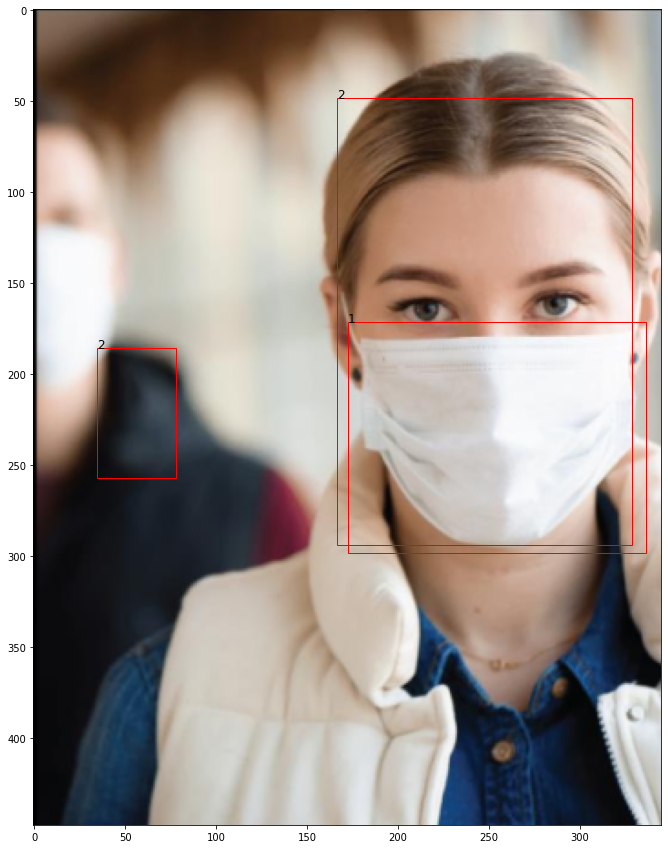

In [125]:
picture_pil = Image.open("img2.png")
image = transform(picture_pil).to(device, dtype=torch.float32)[:3, :, :]
preds = model_detection(image.unsqueeze(0))
draw_pic_with_rect(image.cpu().detach().to(dtype=torch.int), preds[0]["boxes"].cpu().detach(), preds[0]["labels"].cpu().detach().tolist(), 4)

In [ ]:
x1, y1 = (116, 33) 
x2, y2 = (160, 84)
a = img[33:84, 116:160]


gray = cv2.cvtColor(src=a, code=cv2.COLOR_BGR2GRAY)

faces = dlib.rectangles([dlib.rectangle(0, 0, 51, 44)])

# print(faces)
    
for face in faces:
    x1 = face.left() 
    y1 = face.top() 
    x2 = face.right() 
    y2 = face.bottom() 

    landmarks = predictor(image=gray, box=face)
    cv2.rectangle(img=a, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=4)

    for n in range(68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        #print(x, y)
        cv2.circle(img=a, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

cv2_imshow(a)

In [155]:
a.shape

(51, 44, 3)

In [281]:
!python3 ./run.py -img="img8.jpeg" -ml=/content/shape_predictor_68_face_landmarks.dat -md=/content/model_6.pt -out=test1.jpg

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
img = Image.open('test1.jpg')
plt.figure(figsize=(15, 15))
plt.imshow(img)